## Programming Exercise 5: Regularized Linear Regression and Bias v.s. Variance
#### Author - Rishabh Jain

In [1]:
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

from scipy.io import loadmat

### 1&nbsp;&nbsp;&nbsp;&nbsp;Regularized Linear Regression

#### Problem Statement
In this part of the exercise, we will implement regularized linear regression to predict the amount of water flowing out of a dam using the change of water level in reservoir.

In [2]:
# Loading Mat file
mat=loadmat('./ex5data1.mat')
print(*mat.keys(),sep='\n')

__header__
__version__
__globals__
X
y
Xtest
ytest
Xval
yval


In [3]:
# Loading training data from mat to Dataframe
m,n=mat['X'].shape

data=pd.DataFrame()
data['X']=mat['X'].reshape(-1)
data['y']=mat['y'].reshape(-1)

print('TRAINING DATASET SHAPE : {0} X {1}'.format(*data.shape))
data

TRAINING DATASET SHAPE : 12 X 2


,X,y
0,-15.936758,2.134311
1,-29.152979,1.173257
2,36.189549,34.359109
3,37.492187,36.837955
4,-48.058829,2.808965
5,-8.941458,2.121072
6,15.307793,14.710268
7,-34.706266,2.614184
8,1.389154,3.740172
9,-44.383760,3.731691


#### 1.1&nbsp;&nbsp;&nbsp;&nbsp;Visualizing the dataset

We will begin by visualizing the dataset containing the historical records on the change in water level ($X$), and the amount of water flowing out of the dam ($y$). As we can notice from the above cell, that this dataset is divided into three parts :

* **Training set** - We will use $X$ and $y$ to train our model.
* **Cross valiation set** - We will use $Xval$ and $yval$ for determining the regularization parameters.
* **Test set** - We will use $Xtest$ and $ytest$ for evaluating model performance. These are the 'unseen' examples which our model did not see during training.

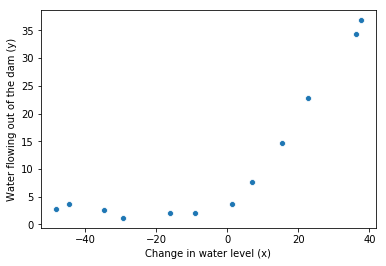

In [4]:
ax=sns.scatterplot(data['X'],data['y']);
ax.set(xlabel='Change in water level (x)',ylabel='Water flowing out of the dam (y)');

#### 1.2&nbsp;&nbsp;&nbsp;&nbsp;Regularized linear regression cost function

We discussed the three types of regularization in [Exercise-2](https://nbviewer.jupyter.org/github/rj425/ML-Coursera/blob/master/Exercise-2/ex2.ipynb#Types-of-Regularization). Regularized cost function in linear regression looks something like this :

$$ J(\theta)=\frac{1}{2m}[\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^2+\lambda\sum_{j=1}^n\theta_j^2] $$

where $\lambda$ is a regularization parameter which controls the degree of regularization, thus help preventing overfitting. The regularizartion parameter puts a penalty on overall cost $J$. As the magnitude of model parameters $\theta_j$ increases, the penalty increases as well.

#### 1.3&nbsp;&nbsp;&nbsp;&nbsp;Regularized linear regression gradient

Correspondingly, the partial derivative of regularized linear regression's cost for $J$ is defined as :

$$ \frac{\partial}{\partial{\theta_0}}J(\theta)=\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}\;\;\;\;\text{for }j=0 $$

$$ \frac{\partial}{\partial{\theta_0}}J(\theta)=\frac{1}{m}[\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}+\lambda\theta_j]\;\;\;\;\text{for }j\geq1 $$

**Using Gradient Descent Optimization Algorithm**
$$ \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta) $$  

In [5]:
def predict(X,theta):
    '''Predicts using the Linear Model'''
    h=np.dot(X,theta.T)
    return h

In [6]:
def computeCost(X,y,theta,lmbda):
    '''Computes and returns the cost and gradient'''
    m=y.shape[0]
    h=predict(X,theta)
    J=(1/(2*m))*(np.power(h-y,2).sum()+lmbda*np.power(theta[:,1:],2).sum())
    grad=(1/m)*(np.dot((h-y).T,X)+lmbda*np.column_stack((np.zeros(shape=(1,1)),theta[:,1:])))
    return (J,grad)

In [7]:
X=data['X']
# Adding intercept column
X=np.column_stack((np.ones((m,1)),X))
y=data['y'].values.reshape((-1,1))
theta=np.ones((1,2))
lmbda=1

J,grad=computeCost(X,y,theta,lmbda)
print(f'REGULARIZED COST FUNCTION : {J:.3f}')
print(f'GRADIENT : {grad[0]}')

REGULARIZED COST FUNCTION : 303.993
GRADIENT : [-15.30301567 598.25074417]


#### 1.4&nbsp;&nbsp;&nbsp;&nbsp;Fitting linear regression

**In this part, we set the regularization parameter $\lambda$ to zero. Because our current implementation is trying to fit 2-dimensional $\theta$, regularization will not be incredibly helpful for a $\theta$ of such low dimension.**

In [8]:
def train(X,y,alpha,lmbda,iterations):
    '''Trains the linear regression model using gradient descent optimization algorithm'''
    theta=np.zeros((1,X.shape[1]))
    jHistory=[]
    for i in range(iterations):
        J,grad=computeCost(X,y,theta,lmbda)
        theta=theta-alpha*grad
        jHistory.append(J)
    return jHistory,theta

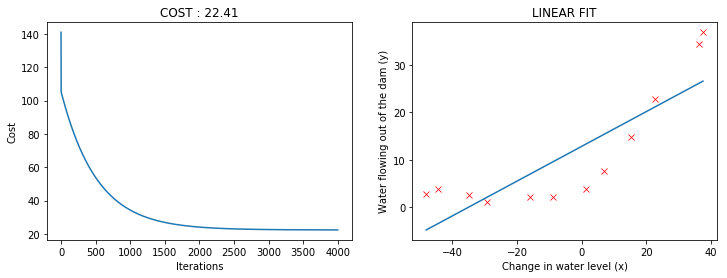

In [9]:
alpha=0.001
lmbda=0
iterations=4000

# Training
jHistory,theta=train(X,y,alpha,lmbda,iterations)

# Plotting cost curve
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,4))
ch1=sns.lineplot(range(iterations),jHistory,ax=ax[0])
ch1.set(xlabel='Iterations',yLabel='Cost')
ax[0].set_title(f'COST : {jHistory[iterations-1]:.2f}')

# Plotting model and data
sns.scatterplot(data['X'],data['y'],color='red',marker='x',ax=ax[1])
ch2=sns.lineplot(data['X'],predict(X,theta).reshape(-1),ax=ax[1])
ch2.set(xlabel='Change in water level (x)',ylabel='Water flowing out of the dam (y)')
ax[1].set_title('LINEAR FIT');

**The best fit line tells us that the model is not a good fit for the data because the data has non linear pattern.**

While visualizing the best fit as shown above is one possible way to debug you learning algorithm, but it is not always easy to visualize the data and model. In the next exercise, we will implement a function to generate learning curves that can help us debug our learning algorithm even if it is not easy to visualize the data and the model.

### 2&nbsp;&nbsp;&nbsp;&nbsp;Bias-Variance

An important concept in Machine Learning is **Bias-Variance tradeoff**. Models with high bias are not complex enough for the data and tend to underfit. while models with high variance overfit the training data.

<img src="images/bias_variance.png" width="400">

#### 2.1&nbsp;&nbsp;&nbsp;&nbsp;Learning curves

**Learning Curve: Line plot of learning (y-axis) over experience (x-axis).**  
In this part of the exercise, we will plot training and test errors on a learning curve to diagnose bias-variance problem.
To plot the learning cruve, we need a training and cross validation set error for different training set sizes.

In [10]:
def learningCurve(X,y,Xval,yval,alpha,lmbda,iterations):
    '''Generates the train and cross validation set errors needed to plot a learning curve'''
    m=X.shape[0]
    errorTrain,errorVal=[],[]
    # Training model with different training set size
    for i in range(1,m+1):
        theta=train(X[:i,:],y[:i],alpha,lmbda,iterations)[1]
        # Computing training error using learned parameters
        errorTrain.append(computeCost(X[:i,:],y[:i],theta,lmbda)[0])
        # Computing cross validation error for the entire validation set
        errorVal.append(computeCost(Xval,yval,theta,lmbda)[0])
    return (errorTrain,errorVal)

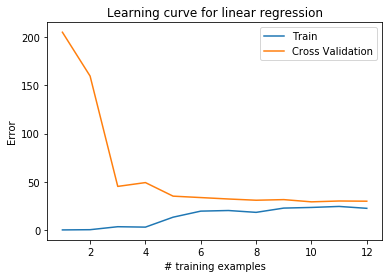

In [11]:
Xval=mat['Xval']
Xval=np.column_stack((np.ones((Xval.shape[0],1)),Xval))
yval=mat['yval'].reshape((-1,1))

errorTrain,errorVal=learningCurve(X,y,Xval,yval,alpha,lmbda,iterations)
sns.lineplot(range(1,m+1),errorTrain,label='Train')
ch=sns.lineplot(range(1,m+1),errorVal,label='Cross Validation')
ch.set(xlabel='# training examples',ylabel='Error',title='Learning curve for linear regression');

In the above figure, we can observe that both the train and cross validation error are high when the number of training examples is increased. This reflects a **high bias** problem in our model - the linear regression model is too simple and unable to fit our dataset well.

### 3&nbsp;&nbsp;&nbsp;&nbsp;Polynomial Regression

Thr problem with our linear model was that it was too simple for the data and resulted in underfitting (high bias). In this part of the exercise, we will address the problem by adding more features. For polynomial regression, our hypothesis has the form : 

$ h_\theta(x)=\theta_0+\theta_1*(waterLevel)+\theta_2*(waterLevel)^{2}+...++\theta_p*(waterLevel)^{p} $  
$ \;\;\;\;\;\;\;\;=\theta_0+\theta_1*x_1+\theta_2*x_2+...++\theta_p*x_p $

Notice that by defining $x_1=(waterLevel)$, $x_2=(waterLevel)^2$ ,.., $x_p=(waterLevel)^p$, we obtain a linear regression model where the features are the varipous powers of the original value (waterLevel).

In [12]:
def polyFeatures(X,p):
    '''Maps each example into its p polynomial features'''
    xPoly=np.zeros(shape=(X.shape[0],p))
    for i in range(1,p+1):
        xPoly[:,i-1]=np.power(X,i)
    return xPoly

#### 3.1&nbsp;&nbsp;&nbsp;&nbsp;Learning Polynomial Regression

Keep in mind that even though we have polynomial terms in our feature vector, we are still solving a linear regression optimization problem. The polynomial terms have simply turned into features that we can use for linear regression.

For this part of the exercise, we will use a polynomial of degree 8. **It turns out that if we run the training directly on projected data, model will not work well as the features would be badly scaled** (e.g. a sample with $x=40$ will now have a feature $ x_8=40^8=6.5X10^{12} $).

In [13]:
def featureNormalize(X,mean=None,std=None):
    '''Normalizes the Design Matrix'''
    if type(mean)== type(None) and type(std)==type(None):
        mean=X.mean(axis=0)
        std=X.std(axis=0)
    xNorm=(X-mean)/std
    return (xNorm,mean,std)

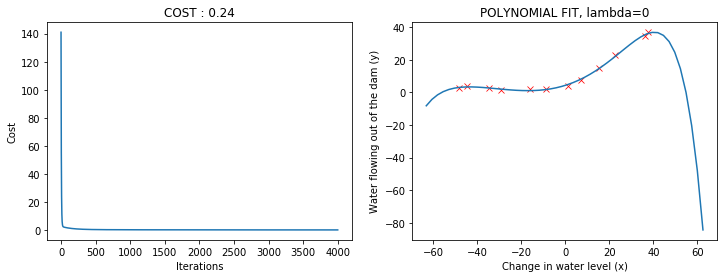

In [14]:
alpha=0.1
lmbda=0
iterations=4000
p=8

# Mapping X onto polynomial features
xPoly=polyFeatures(data['X'],p)
# Normalize features
xPoly,mean,std=featureNormalize(xPoly)
# Adding intercept column
xPoly=np.column_stack((np.ones((m,1)),xPoly))

# Training
jHistory,theta=train(xPoly,y,alpha,lmbda,iterations)

# Plotting cost curve
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,4))
ch1=sns.lineplot(range(iterations),jHistory,ax=ax[0])
ch1.set(xlabel='Iterations',yLabel='Cost')
ax[0].set_title(f'COST : {jHistory[iterations-1]:.2f}')

# Plotting data 
sns.scatterplot(data['X'],data['y'],color='red',marker='x',ax=ax[1])
# Plotting model with extremes
x=np.linspace(data['X'].min()-15,data['X'].max()+25)
xTemp=polyFeatures(x,p)
# Normalizing with training set mean and std
xTemp=featureNormalize(xTemp,mean,std)[0]
xTemp=np.column_stack((np.ones((xTemp.shape[0],1)),xTemp))
ch2=sns.lineplot(x,predict(xTemp,theta).reshape(-1),ax=ax[1])
ch2.set(xlabel='Change in water level (x)',ylabel='Water flowing out of the dam (y)')
ax[1].set_title(f'POLYNOMIAL FIT, lambda={lmbda}');

From the above figure in right, we can see that the polynomial fit is able to follow the datapoints very well - thus, obtaining a low training error. However , the polynomial fit is very complex and even drops off at the extremes. This is an indicator that the polynomial regression model is overfitting the training data and will not generalize well.

**Let's try to understand the above conclusion using learning curve.**

In [15]:
# Mapping X onto polynomial features
xValPoly=polyFeatures(mat['Xval'].reshape(-1),p)
# Normalize features
xValPoly=featureNormalize(xValPoly,mean,std)[0]
# Adding intercept column
xValPoly=np.column_stack((np.ones((xValPoly.shape[0],1)),xValPoly))

errorTrain,errorVal=learningCurve(xPoly,y,xValPoly,yval,alpha,lmbda,iterations)

To better understand the problems with the unregularized ($\lambda=0$) model, we can see that the learning curve shows the same effect where the training error is low, but the cross validation error is high, There is a gap between the training and cross validation errors, indicating a **high variance** problem.

**One way to combat the overfitting (high-variance) problem is to add regularization to the model.**

#### 3.2&nbsp;&nbsp;&nbsp;&nbsp;Adjusting the regularization parameter (Optional)

In this section, we will observe how the regularization parameter affects the bias-variance of regularized polynimial regression.

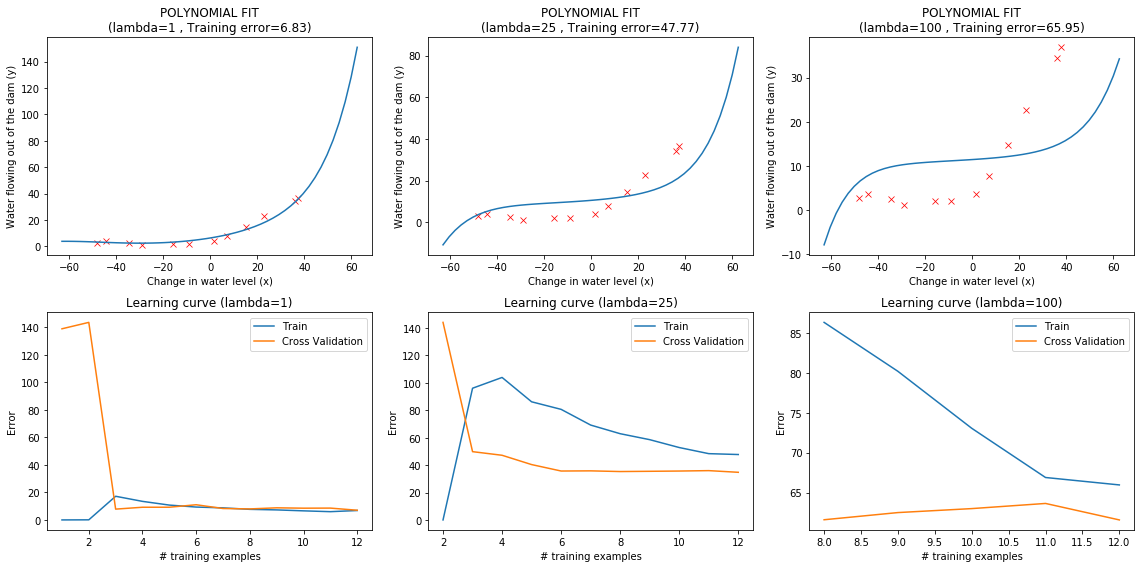

In [16]:
lmbdas=[1,25,100]

nrows,ncols=2,len(lmbdas)
fig,ax=plt.subplots(nrows,ncols,figsize=(16,8))

for i in range(ncols):
    # Training
    jHistory,theta=train(xPoly,y,alpha,lmbdas[i],iterations)
    # Plotting data 
    sns.scatterplot(data['X'],data['y'],color='red',marker='x',ax=ax[0][i])
    # Plotting model with extremes
    x=np.linspace(data['X'].min()-15,data['X'].max()+25)
    xTemp=polyFeatures(x,p)
    # Normalizing with training set mean and std
    xTemp=featureNormalize(xTemp,mean,std)[0]
    xTemp=np.column_stack((np.ones((xTemp.shape[0],1)),xTemp))
    ch2=sns.lineplot(x,predict(xTemp,theta).reshape(-1),ax=ax[0][i])
    ch2.set(xlabel='Change in water level (x)',ylabel='Water flowing out of the dam (y)')
    ax[0][i].set_title(f'POLYNOMIAL FIT\n(lambda={lmbdas[i]} , Training error={jHistory[iterations-1]:.2f})');
    errorTrain,errorVal=learningCurve(xPoly,y,xValPoly,yval,alpha,lmbdas[i],iterations)
    sns.lineplot(range(1,m+1),errorTrain,label='Train',ax=ax[1][i])
    ch=sns.lineplot(range(1,m+1),errorVal,label='Cross Validation',ax=ax[1][i])
    ch.set(xlabel='# training examples',ylabel='Error',title=f'Learning curve (lambda={lmbdas[i]})');
fig.tight_layout()

+ For $\lambda=1$, we should see a polynomial fit that follows the data trend well and a learning curve showing that both the cross validation and training error converge to a relatively low value. This shows $\lambda=1$ regularized polynomial regression model does not have the high bias or high variance. In effect, it achieves a good trade-off between bias and variance.
+ For $\lambda=100$, we should see a polynomial fit that does nt follow the data well. In this case, there is too much regularization and the model is unable to fit the training data.

#### 3.3&nbsp;&nbsp;&nbsp;&nbsp;Selecting $\lambda$ using a cross validation set

In this section, we will implement an automated method to select the $\lambda$ parameter. Concretely, we will use a cross validation set to evaluate how good each $\lambda$ value is. After selecting the best $\lambda$ value using cross validation set, we can then evaluate the model on test set to estimate how well the model will perform on actual unseen data.

In [17]:
def validationCurve(X,y,Xval,yval,lmbdas):
    m=X.shape[0]
    errorTrain,errorVal=[],[]
    # Training model with different lambda values
    for lmbda in lmbdas:
        theta=train(X,y,alpha,lmbda,iterations)[1]
        # Computing training error using learned parameters
        errorTrain.append(computeCost(X,y,theta,lmbda)[0])
        # Computing cross validation error for the entire validation set
        errorVal.append(computeCost(Xval,yval,theta,lmbda)[0])        
    return (errorTrain,errorVal)

For lambda = 0.000	CV Error = 17.237
For lambda = 0.001	CV Error = 17.039
For lambda = 0.003	CV Error = 16.656
For lambda = 0.010	CV Error = 15.443
For lambda = 0.030	CV Error = 12.812
For lambda = 0.100	CV Error = 8.436
For lambda = 0.300	CV Error = 5.932
For lambda = 1.000	CV Error = 7.047
For lambda = 3.000	CV Error = 9.782
For lambda = 10.000	CV Error = 18.634

BEST LAMBDA VALUE : 0.3


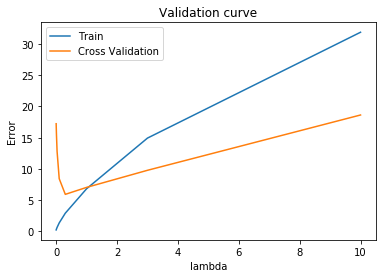

In [18]:
lmbdas=[0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]

errorTrain,errorVal=validationCurve(xPoly,y,xValPoly,yval,lmbdas)
# Plotting Validation curve
sns.lineplot(lmbdas,errorTrain,label='Train')
ch=sns.lineplot(lmbdas,errorVal,label='Cross Validation')
ch.set(xlabel='lambda',ylabel='Error',title='Validation curve');

for i in range(len(lmbdas)):
    print(f'For lambda = {lmbdas[i]:.3f}\tCV Error = {errorVal[i]:.3f}')

# Finding the right lambda value by choosing the model with lowest cross validation error
lmbda=lmbdas[np.argmin(np.array(errorVal))]
print(f'\nBEST LAMBDA VALUE : {lmbda}')

In the above figure, we can see that the best value of $\lambda$ is around 0.3.**Due to randomness in the training and validation splits of the dataset, the cross validation error can sometimes be lower than the training error.**
we can find the right lambda value by by choosing the model with lowest cross validation error.

#### 3.4&nbsp;&nbsp;&nbsp;&nbsp;Computing test set error (Optional)

To get a better indication of model's performance in the real world, it is important to evaluate the 'final' model on a test set that was not used in any part of training (that is, it was neither used to select the $\lambda$ parameters, nor to learn the model parameters $\theta$)

In [19]:
# Mapping X onto polynomial features
xTestPoly=polyFeatures(mat['Xtest'].reshape(-1),p)
# Normalize features
xTestPoly=featureNormalize(xTestPoly,mean,std)[0]
# Adding intercept column
xTestPoly=np.column_stack((np.ones((xTestPoly.shape[0],1)),xTestPoly))
yTest=mat['ytest']

# Training
jHistory,theta=train(xPoly,y,alpha,lmbda,iterations)

# Computing cost for test set
J=computeCost(xTestPoly,yTest,theta,lmbda)[0]
print(f'TEST Error : {J:.2f}')

TEST Error : 6.49


<img src="images/meme.png" width="300">